In [9]:
import dlib
import cv2
import numpy as np

from skimage import io, transform
import matplotlib.pyplot as plt

import pandas as pd
import glob
import openface
%matplotlib inline

In [10]:
filename = './data/test/2.jpg'
image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [11]:
face_detector = dlib.get_frontal_face_detector()
face_pose_predictor = dlib.shape_predictor('./data/model/shape_predictor_68_face_landmarks.dat')
face_aligner = openface.AlignDlib('./data/model/shape_predictor_68_face_landmarks.dat')
detected_faces = face_detector(image, 1)

Figure(720x720)
AxesSubplot(0.125,0.125;0.775x0.755)
0
[(339, 219) (494, 374)]
(347, 260)
(345, 279)
(345, 298)
(346, 316)
(351, 333)
(363, 347)
(379, 358)
(399, 365)
(420, 367)
(441, 364)
(457, 355)
(470, 343)
(479, 329)
(484, 313)
(486, 297)
(487, 282)
(487, 266)
(364, 246)
(375, 239)
(388, 238)
(402, 240)
(414, 246)
(439, 246)
(451, 242)
(463, 241)
(474, 244)
(481, 252)
(426, 260)
(426, 270)
(427, 280)
(427, 291)
(407, 297)
(416, 301)
(425, 304)
(434, 301)
(441, 298)
(376, 259)
(385, 255)
(395, 256)
(404, 262)
(395, 263)
(384, 262)
(442, 264)
(452, 258)
(461, 258)
(469, 263)
(462, 266)
(452, 265)
(393, 319)
(405, 313)
(416, 311)
(424, 314)
(432, 312)
(442, 315)
(450, 322)
(441, 327)
(432, 331)
(423, 331)
(415, 330)
(404, 325)
(397, 319)
(416, 319)
(424, 320)
(432, 319)
(446, 321)
(432, 320)
(424, 321)
(416, 320)


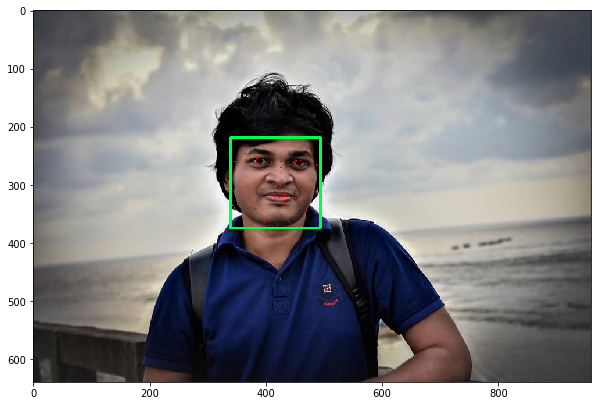

In [13]:
img = np.copy(image)
f, ax = plt.subplots(ncols=len(detected_faces), figsize=(10,10))

for i, f in enumerate(detected_faces):
    cv2.rectangle(img, (f.left(), f.top()), (f.right(), f.bottom()), (0,255,70), 3)
    pose_landmarks = face_pose_predictor(img, f)
    
    for p in pose_landmarks.parts():
        cv2.circle(img, (p.x, p.y), 1, (255,0,0))

    alignedFace = face_aligner.align(534, image, f, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
    ax.imshow(alignedFace)
plt.imshow(img)